# Data_Expression_mRNA_9classes Dataset

# Importing Libraries

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import scipy.cluster.hierarchy as shc

C:\Users\SCM\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Exploratory Data Analysis

# Importing Dataset

In [119]:
df = pd.read_csv ("Data_Expression_mRNA_9classes.csv")
df

,Classes,gen1,gen2,gen3,gen4,gen5,gen6,gen7,gen8,gen9,...,gen2996,gen2997,gen2998,gen2999,gen3000,gen3001,gen3002,gen3003,gen3004,gen3005
0,1,0,0,0,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,3,1,0,2,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,3,1,6,4,1,2,1,0,5,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,9,1,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,1,2
4994,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,0


# First 10 Records

In [120]:
df.head(10)

C:\Users\SCM\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Classes,gen1,gen2,gen3,gen4,gen5,gen6,gen7,gen8,gen9,...,gen2996,gen2997,gen2998,gen2999,gen3000,gen3001,gen3002,gen3003,gen3004,gen3005
0,1,0,0,0,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,3,1,0,2,2,2,2,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,3,1,6,4,1,2,1,0,5,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,1,...,0,0,0,2,0,0,0,0,0,0
6,1,0,0,2,3,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
7,1,11,0,25,1,10,0,7,0,8,...,0,0,1,0,0,0,0,0,0,0
8,1,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,1
9,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Columns

In [121]:
df.columns

C:\Users\SCM\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Classes', 'gen1', 'gen2', 'gen3', 'gen4', 'gen5', 'gen6', 'gen7',
       'gen8', 'gen9',
       ...
       'gen2996', 'gen2997', 'gen2998', 'gen2999', 'gen3000', 'gen3001',
       'gen3002', 'gen3003', 'gen3004', 'gen3005'],
      dtype='object', length=3006)

# Statistical Analysis

In [122]:
df.describe()

,Classes,gen1,gen2,gen3,gen4,gen5,gen6,gen7,gen8,gen9,...,gen2996,gen2997,gen2998,gen2999,gen3000,gen3001,gen3002,gen3003,gen3004,gen3005
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.00000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,3.514006,2.765306,2.827931,3.970788,4.295318,2.683874,3.149260,3.923770,2.410964,2.85034,...,0.693677,0.302921,0.800520,0.852541,0.499800,0.489596,0.283713,0.457383,0.348339,0.545418
std,2.108832,15.351552,15.632870,20.972874,23.376756,9.013659,13.078286,18.812813,7.135077,10.03827,...,9.214301,4.996965,8.445307,6.455933,6.564157,3.315356,1.754932,5.652721,4.522254,3.900791
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,822.000000,869.000000,1237.000000,1252.000000,271.000000,631.000000,986.000000,208.000000,397.00000,...,611.000000,327.000000,560.000000,410.000000,441.000000,206.000000,96.000000,376.000000,303.000000,242.000000


# Data Cleaning

In [123]:
#To check values
for col in df.columns:
    print(col , df[col].isnull().sum())

C:\Users\SCM\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classes 0
gen1 0
gen2 0
gen3 0
gen4 0
gen5 0
gen6 0
gen7 0
gen8 0
gen9 0
gen10 0
gen11 0
gen12 0
gen13 0
gen14 0
gen15 0
gen16 0
gen17 0
gen18 0
gen19 0
gen20 0
gen21 0
gen22 0
gen23 0
gen24 0
gen25 0
gen26 0
gen27 0
gen28 0
gen29 0
gen30 0
gen31 0
gen32 0
gen33 0
gen34 0
gen35 0
gen36 0
gen37 0
gen38 0
gen39 0
gen40 0
gen41 0
gen42 0
gen43 0
gen44 0
gen45 0
gen46 0
gen47 0
gen48 0
gen49 0
gen50 0
gen51 0
gen52 0
gen53 0
gen54 0
gen55 0
gen56 0
gen57 0
gen58 0
gen59 0
gen60 0
gen61 0
gen62 0
gen63 0
gen64 0
gen65 0
gen66 0
gen67 0
gen68 0
gen69 0
gen70 0
gen71 0
gen72 0
gen73 0
gen74 0
gen75 0
gen76 0
gen77 0
gen78 0
gen79 0
gen80 0
gen81 0
gen82 0
gen83 0
gen84 0
gen85 0
gen86 0
gen87 0
gen88 0
gen89 0
gen90 0
gen91 0
gen92 0
gen93 0
gen94 0
gen95 0
gen96 0
gen97 0
gen98 0
gen99 0
gen100 0
gen101 0
gen102 0
gen103 0
gen104 0
gen105 0
gen106 0
gen107 0
gen108 0
gen109 0
gen110 0
gen111 0
gen112 0
gen113 0
gen114 0
gen115 0
gen116 0
gen117 0
gen118 0
gen119 0
gen120 0
gen121 0
gen122 0


gen960 0
gen961 0
gen962 0
gen963 0
gen964 0
gen965 0
gen966 0
gen967 0
gen968 0
gen969 0
gen970 0
gen971 0
gen972 0
gen973 0
gen974 0
gen975 0
gen976 0
gen977 0
gen978 0
gen979 0
gen980 0
gen981 0
gen982 0
gen983 0
gen984 0
gen985 0
gen986 0
gen987 0
gen988 0
gen989 0
gen990 0
gen991 0
gen992 0
gen993 0
gen994 0
gen995 0
gen996 0
gen997 0
gen998 0
gen999 0
gen1000 0
gen1001 0
gen1002 0
gen1003 0
gen1004 0
gen1005 0
gen1006 0
gen1007 0
gen1008 0
gen1009 0
gen1010 0
gen1011 0
gen1012 0
gen1013 0
gen1014 0
gen1015 0
gen1016 0
gen1017 0
gen1018 0
gen1019 0
gen1020 0
gen1021 0
gen1022 0
gen1023 0
gen1024 0
gen1025 0
gen1026 0
gen1027 0
gen1028 0
gen1029 0
gen1030 0
gen1031 0
gen1032 0
gen1033 0
gen1034 0
gen1035 0
gen1036 0
gen1037 0
gen1038 0
gen1039 0
gen1040 0
gen1041 0
gen1042 0
gen1043 0
gen1044 0
gen1045 0
gen1046 0
gen1047 0
gen1048 0
gen1049 0
gen1050 0
gen1051 0
gen1052 0
gen1053 0
gen1054 0
gen1055 0
gen1056 0
gen1057 0
gen1058 0
gen1059 0
gen1060 0
gen1061 0
gen1062 0
gen1063 0


gen1849 0
gen1850 0
gen1851 0
gen1852 0
gen1853 0
gen1854 0
gen1855 0
gen1856 0
gen1857 0
gen1858 0
gen1859 0
gen1860 0
gen1861 0
gen1862 0
gen1863 0
gen1864 0
gen1865 0
gen1866 0
gen1867 0
gen1868 0
gen1869 0
gen1870 0
gen1871 0
gen1872 0
gen1873 0
gen1874 0
gen1875 0
gen1876 0
gen1877 0
gen1878 0
gen1879 0
gen1880 0
gen1881 0
gen1882 0
gen1883 0
gen1884 0
gen1885 0
gen1886 0
gen1887 0
gen1888 0
gen1889 0
gen1890 0
gen1891 0
gen1892 0
gen1893 0
gen1894 0
gen1895 0
gen1896 0
gen1897 0
gen1898 0
gen1899 0
gen1900 0
gen1901 0
gen1902 0
gen1903 0
gen1904 0
gen1905 0
gen1906 0
gen1907 0
gen1908 0
gen1909 0
gen1910 0
gen1911 0
gen1912 0
gen1913 0
gen1914 0
gen1915 0
gen1916 0
gen1917 0
gen1918 0
gen1919 0
gen1920 0
gen1921 0
gen1922 0
gen1923 0
gen1924 0
gen1925 0
gen1926 0
gen1927 0
gen1928 0
gen1929 0
gen1930 0
gen1931 0
gen1932 0
gen1933 0
gen1934 0
gen1935 0
gen1936 0
gen1937 0
gen1938 0
gen1939 0
gen1940 0
gen1941 0
gen1942 0
gen1943 0
gen1944 0
gen1945 0
gen1946 0
gen1947 0
gen1948 0


gen2830 0
gen2831 0
gen2832 0
gen2833 0
gen2834 0
gen2835 0
gen2836 0
gen2837 0
gen2838 0
gen2839 0
gen2840 0
gen2841 0
gen2842 0
gen2843 0
gen2844 0
gen2845 0
gen2846 0
gen2847 0
gen2848 0
gen2849 0
gen2850 0
gen2851 0
gen2852 0
gen2853 0
gen2854 0
gen2855 0
gen2856 0
gen2857 0
gen2858 0
gen2859 0
gen2860 0
gen2861 0
gen2862 0
gen2863 0
gen2864 0
gen2865 0
gen2866 0
gen2867 0
gen2868 0
gen2869 0
gen2870 0
gen2871 0
gen2872 0
gen2873 0
gen2874 0
gen2875 0
gen2876 0
gen2877 0
gen2878 0
gen2879 0
gen2880 0
gen2881 0
gen2882 0
gen2883 0
gen2884 0
gen2885 0
gen2886 0
gen2887 0
gen2888 0
gen2889 0
gen2890 0
gen2891 0
gen2892 0
gen2893 0
gen2894 0
gen2895 0
gen2896 0
gen2897 0
gen2898 0
gen2899 0
gen2900 0
gen2901 0
gen2902 0
gen2903 0
gen2904 0
gen2905 0
gen2906 0
gen2907 0
gen2908 0
gen2909 0
gen2910 0
gen2911 0
gen2912 0
gen2913 0
gen2914 0
gen2915 0
gen2916 0
gen2917 0
gen2918 0
gen2919 0
gen2920 0
gen2921 0
gen2922 0
gen2923 0
gen2924 0
gen2925 0
gen2926 0
gen2927 0
gen2928 0
gen2929 0


# Finding Duplicate values

In [124]:
df.duplicated(subset=None,keep='first').sum()

0

# Data Types

In [125]:
df.dtypes

Classes    int64
gen1       int64
gen2       int64
gen3       int64
gen4       int64
           ...  
gen3001    int64
gen3002    int64
gen3003    int64
gen3004    int64
gen3005    int64
Length: 3006, dtype: object

# Data Shape

In [126]:
print('No of rows and Columns')
df.shape

No of rows and Columns


(4998, 3006)

# Spliting Data

Now i am creating two data frames from this dataset one is of target variable/feature and other is of remaining features of dataset. This is done for ease of use when comparing target feature with the results obtained with different methods for clustering.

In [127]:
Y = pd.DataFrame()
Y['Classes'] = df['Classes']
# Droping target feature from our dataset. which we need to apply algorithms.
X = df.drop('Classes',axis=1)
X

,gen1,gen2,gen3,gen4,gen5,gen6,gen7,gen8,gen9,gen10,...,gen2996,gen2997,gen2998,gen2999,gen3000,gen3001,gen3002,gen3003,gen3004,gen3005
0,0,0,0,3,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,1,0,2,2,2,2,1,0,2,...,0,0,0,0,0,0,0,0,0,1
2,3,1,6,4,1,2,1,0,5,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,1,2
4994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,0


# Scaling Dataset

we need to scale the data afront to apply the algo as Measurement units weight one better than other and affect final result of clustering algorithm. For example the parameters may be 'Height (m)' or 'Weight (pounds)' of humans. Height is a small in units (eg 1.8m) which may be weighted less when compared to weight (160 pounds etc) as machine understand only numerics and do not care about units.

In [128]:
X = pd.DataFrame(preprocessing.scale(df.iloc[:,:]))

C:\Users\SCM\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Model Building

# 1- k-Means Clustering Algorithm

# Creating Object Of K-Means with Parameter optimization

In [129]:
from sklearn.cluster import KMeans        
kmeans = KMeans(n_clusters = 9, init = 'k-means++', random_state = 42, n_init=10,
                max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, 
                copy_x=True, n_jobs=None, algorithm='auto')
kmeans

C:\Users\SCM\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans(n_clusters=9, n_jobs=None, precompute_distances='auto', random_state=42)

# Fit and Predict

In [130]:
y_kmeans = kmeans.fit_predict(X) 
y_kmeans

C:\Users\SCM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\SCM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


array([0, 0, 0, ..., 0, 0, 0])

# Accuracy


In [131]:
print( "Accuracy : " ,accuracy_score(Y, y_kmeans))

Accuracy :  0.0024009603841536613


C:\Users\SCM\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 2- KNN Classifier

# Spliting to Test and Training Section

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=6)

C:\Users\SCM\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Shapes of Training and Test section

In [133]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3348, 3006)
(3348, 1)
(1650, 3006)
(1650, 1)


# Accuracy Comparison with Graph By Traing And Test Data

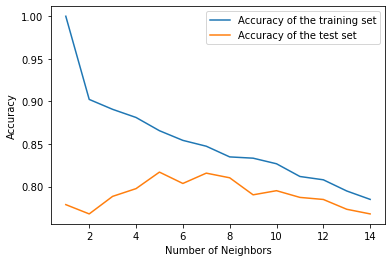

In [134]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,np.ravel(y_train,order='C'))
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
#by looking at plot, best result accurs when n_neighbors is 6

# Accuracy For 6 Nearest Neighbors

In [135]:
print("Accuracy of the training set for 6NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the test set for 6NN: {:3f}".format(test_accuracy[5]))

Accuracy of the training set for 6NN: 0.854241
Accuracy of the test set for 6NN: 0.803636


C:\Users\SCM\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
import warnings
warnings.filterwarnings('ignore')

warnings.filterwarnings(action='once')

# Accuracy Of All Nearest 20 Neighbores

In [137]:
# classification accuracies for train and test data.  
for i in range(20):
  i = i+1
  clf = KNeighborsClassifier(n_neighbors=i) 
  clf.fit(X_train, np.ravel(y_train,order='C'))
  print('Accuracy for the value of k= ' , i , 'is:', clf.score(X_test, y_test))
y_pred = clf.predict(X_test)

C:\Users\SCM\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy for the value of k=  1 is: 0.7787878787878788
Accuracy for the value of k=  2 is: 0.7678787878787878
Accuracy for the value of k=  3 is: 0.7884848484848485
Accuracy for the value of k=  4 is: 0.7975757575757576
Accuracy for the value of k=  5 is: 0.816969696969697
Accuracy for the value of k=  6 is: 0.8036363636363636
Accuracy for the value of k=  7 is: 0.8157575757575758
Accuracy for the value of k=  8 is: 0.8103030303030303
Accuracy for the value of k=  9 is: 0.7903030303030303
Accuracy for the value of k=  10 is: 0.7951515151515152
Accuracy for the value of k=  11 is: 0.7872727272727272
Accuracy for the value of k=  12 is: 0.7848484848484848
Accuracy for the value of k=  13 is: 0.7733333333333333
Accuracy for the value of k=  14 is: 0.7678787878787878
Accuracy for the value of k=  15 is: 0.7624242424242424
Accuracy for the value of k=  16 is: 0.7587878787878788
Accuracy for the value of k=  17 is: 0.7545454545454545
Accuracy for the value of k=  18 is: 0.7509090909090909
Ac

# RMSE of 20 Neighbors

In [138]:
#import required libraries
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error


rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, np.ravel(y_train,order='C'))  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

C:\Users\SCM\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE value for k=  1 is: 0.9075441386711522
RMSE value for k=  2 is: 0.7679172935264381
RMSE value for k=  3 is: 0.7302506372924253
RMSE value for k=  4 is: 0.6926289399706371
RMSE value for k=  5 is: 0.6768375661184084
RMSE value for k=  6 is: 0.6607821098009514
RMSE value for k=  7 is: 0.6564649241661601
RMSE value for k=  8 is: 0.6497887185754142
RMSE value for k=  9 is: 0.6389876954777312
RMSE value for k=  10 is: 0.6345220105072651
RMSE value for k=  11 is: 0.6340058643364608
RMSE value for k=  12 is: 0.6305794726919609
RMSE value for k=  13 is: 0.6299756221962817
RMSE value for k=  14 is: 0.6239078274217434
RMSE value for k=  15 is: 0.6200923141875555
RMSE value for k=  16 is: 0.6162954451864591
RMSE value for k=  17 is: 0.6133138893025057
RMSE value for k=  18 is: 0.6068507755811303
RMSE value for k=  19 is: 0.605033587972881
RMSE value for k=  20 is: 0.6037722327922254


# Comparison of Accuracy

In [139]:
print("Accuracy of KNN Classifier for test set for 6NN: {:3f}".format(test_accuracy[5]))

print( "Accuracy of K-Means Classifier : " ,accuracy_score(Y, y_kmeans))

Accuracy of KNN Classifier for test set for 6NN: 0.803636
Accuracy of K-Means Classifier :  0.0024009603841536613


C:\Users\SCM\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
